In [10]:
from pandas import read_csv
from datetime import datetime
# load data
dataset = read_csv('C_ticker.csv')
# manually specify column names
dataset.columns = ['Date','SellMaxPrice', 'SellMaxVolume','BuyMaxPrice', 'BuyMaxVolume', 'LastTransactionPrice', 'TransactionsVolume', 'MaxPrice', 'MinPrice']
dataset = dataset[dataset > 0]
dataset.index = dataset['Date']
dataset.drop('Date', axis=1, inplace=True)

# drop the first 24 hours
dataset = dataset[(24*12):]
# summarize first 5 rows
display(dataset.head(5))
# save to file
dataset.to_csv('C_ticker copy.csv')

,SellMaxPrice,SellMaxVolume,BuyMaxPrice,BuyMaxVolume,LastTransactionPrice,TransactionsVolume,MaxPrice,MinPrice
Date,,,,,,,,
1510642981,34.891936,372.007889,34.892798,1577.023718,34.892798,110630.4344,37.032048,34.859170
1510643278,34.747939,314.781516,34.748802,553.613024,34.748802,111499.9988,37.032048,34.747077
1510643580,34.724659,295.528344,34.735868,158.189753,34.724659,111782.2612,37.032048,34.724659
1510643879,34.798812,555.761264,34.799675,197.146457,34.799675,112149.7846,37.032048,34.703964
1510644178,34.541861,311.969319,34.542723,472.402038,34.542723,112922.2513,37.032048,34.466845


In [11]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = read_csv('C_ticker copy.csv', header=0, index_col=0)
dataset = dataset[dataset>0]
values = dataset.values
# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
n_5mins = 5 *12
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_5mins, 10)

# drop columns we don't want to predict
h = range(480,560)
k = [485,493,501,509,517,525,533,541,549,557]
reframed.drop(reframed.columns[[item for item in h if item not in k]], axis=1, inplace=True)

print("var6(t) is final price in t 5 minitues later")
display(reframed.head(5))

var6(t) is final price in t 5 minitues later


,var1(t-60),var2(t-60),var3(t-60),var4(t-60),var5(t-60),var6(t-60),var7(t-60),var8(t-60),var1(t-59),var2(t-59),...,var6(t),var6(t+1),var6(t+2),var6(t+3),var6(t+4),var6(t+5),var6(t+6),var6(t+7),var6(t+8),var6(t+9)
60,0.436515,0.021739,0.436218,0.300406,0.436445,0.023485,0.468505,0.489653,0.431775,0.018024,...,0.129983,0.130962,0.131796,0.132286,0.133185,0.133428,0.134942,0.132356,0.133717,0.136639
61,0.431775,0.018024,0.431481,0.101892,0.431705,0.024984,0.468505,0.485514,0.431009,0.016773,...,0.130962,0.131796,0.132286,0.133185,0.133428,0.134942,0.132356,0.133717,0.136639,0.137621
62,0.431009,0.016773,0.431055,0.025191,0.430911,0.025470,0.468505,0.484686,0.433450,0.033670,...,0.131796,0.132286,0.133185,0.133428,0.134942,0.132356,0.133717,0.136639,0.137621,0.138719
63,0.433450,0.033670,0.433155,0.032747,0.433380,0.026104,0.468505,0.483922,0.424991,0.017841,...,0.132286,0.133185,0.133428,0.134942,0.132356,0.133717,0.136639,0.137621,0.138719,0.138940
64,0.424991,0.017841,0.424702,0.086139,0.424923,0.027436,0.468505,0.475167,0.421670,0.010390,...,0.133185,0.133428,0.134942,0.132356,0.133717,0.136639,0.137621,0.138719,0.138940,0.139066


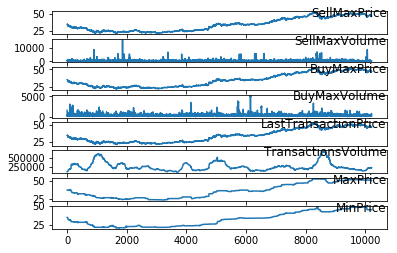

In [12]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('C_ticker copy.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,4, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [13]:
# split into train and test sets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


values = reframed.values
n_obs = n_5mins * n_features
outs = [[0] * 2] * 10
for i in range(10):
    # split into input and outputs
    Testtime = (int)(np.floor((1-0.1)*1498))
    Train = values[0:Testtime,:]
    Test  = values[Testtime:-1,:]
    #train_X, test_X, train_y, test_y = train_test_split(values[:,:n_obs], values[:,-(i+1)], test_size = 0.33, random_state = 42)
    train_X = Train[:,:n_obs]
    train_y = Train[:,-(i+1)]
    test_X = Test[:,:n_obs]
    test_y = Test[:,-(i+1)]
    outs[9-i]=[train_y,test_y]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_5mins, n_features))
test_X = test_X.reshape((test_X.shape[0], n_5mins, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    


(1348, 480) 1348 (1348,)
(1348, 60, 8) (1348,) (7406, 60, 8) (7406,)


Train on 1348 samples, validate on 7406 samples
Epoch 1/50
 - 4s - loss: 0.1614 - val_loss: 0.3075
Epoch 2/50
 - 2s - loss: 0.1145 - val_loss: 0.0938
Epoch 3/50
 - 2s - loss: 0.0635 - val_loss: 0.1666
Epoch 4/50
 - 2s - loss: 0.0648 - val_loss: 0.0210
Epoch 5/50
 - 2s - loss: 0.0365 - val_loss: 0.0425
Epoch 6/50
 - 2s - loss: 0.0537 - val_loss: 0.0562
Epoch 7/50
 - 2s - loss: 0.0532 - val_loss: 0.0339
Epoch 8/50
 - 2s - loss: 0.0387 - val_loss: 0.0717
Epoch 9/50
 - 2s - loss: 0.0327 - val_loss: 0.0415
Epoch 10/50
 - 2s - loss: 0.0384 - val_loss: 0.0822
Epoch 11/50
 - 2s - loss: 0.0220 - val_loss: 0.0416
Epoch 12/50
 - 2s - loss: 0.0174 - val_loss: 0.0981
Epoch 13/50
 - 2s - loss: 0.0279 - val_loss: 0.0971
Epoch 14/50
 - 2s - loss: 0.0262 - val_loss: 0.0845
Epoch 15/50
 - 2s - loss: 0.0280 - val_loss: 0.0833
Epoch 16/50
 - 2s - loss: 0.0185 - val_loss: 0.0433
Epoch 17/50
 - 2s - loss: 0.0240 - val_loss: 0.0941
Epoch 18/50
 - 2s - loss: 0.0179 - val_loss: 0.0420
Epoch 19/50
 - 2s - loss:

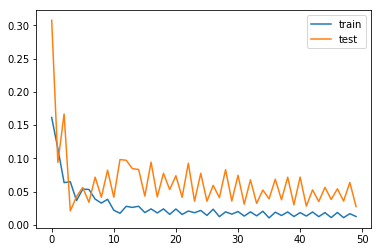

Train on 1348 samples, validate on 7406 samples
Epoch 1/50
 - 4s - loss: 0.1312 - val_loss: 0.2886
Epoch 2/50
 - 2s - loss: 0.0758 - val_loss: 0.1288
Epoch 3/50
 - 2s - loss: 0.0398 - val_loss: 0.0436
Epoch 4/50
 - 2s - loss: 0.0327 - val_loss: 0.0732
Epoch 5/50
 - 2s - loss: 0.0358 - val_loss: 0.2413
Epoch 6/50
 - 2s - loss: 0.0507 - val_loss: 0.0320
Epoch 7/50
 - 2s - loss: 0.0216 - val_loss: 0.0203
Epoch 8/50
 - 2s - loss: 0.0174 - val_loss: 0.0715
Epoch 9/50
 - 2s - loss: 0.0274 - val_loss: 0.1209
Epoch 10/50
 - 2s - loss: 0.0247 - val_loss: 0.0955
Epoch 11/50
 - 2s - loss: 0.0318 - val_loss: 0.0674
Epoch 12/50
 - 2s - loss: 0.0151 - val_loss: 0.0787
Epoch 13/50
 - 2s - loss: 0.0282 - val_loss: 0.0806
Epoch 14/50
 - 2s - loss: 0.0171 - val_loss: 0.0742
Epoch 15/50
 - 2s - loss: 0.0294 - val_loss: 0.0540
Epoch 16/50
 - 2s - loss: 0.0130 - val_loss: 0.0733
Epoch 17/50
 - 2s - loss: 0.0291 - val_loss: 0.0413
Epoch 18/50
 - 2s - loss: 0.0185 - val_loss: 0.0816
Epoch 19/50
 - 2s - loss:

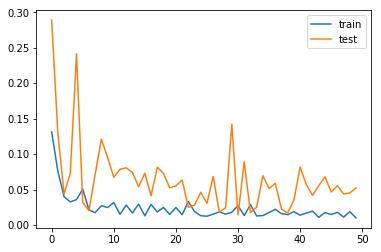

Train on 1348 samples, validate on 7406 samples
Epoch 1/50
 - 4s - loss: 0.1653 - val_loss: 0.3815
Epoch 2/50
 - 2s - loss: 0.1165 - val_loss: 0.0686
Epoch 3/50
 - 2s - loss: 0.0695 - val_loss: 0.1977
Epoch 4/50
 - 2s - loss: 0.0698 - val_loss: 0.0386
Epoch 5/50
 - 2s - loss: 0.0365 - val_loss: 0.0336
Epoch 6/50
 - 2s - loss: 0.0681 - val_loss: 0.2005
Epoch 7/50
 - 2s - loss: 0.0717 - val_loss: 0.1374
Epoch 8/50
 - 2s - loss: 0.0507 - val_loss: 0.0382
Epoch 9/50
 - 2s - loss: 0.0226 - val_loss: 0.1357
Epoch 10/50
 - 2s - loss: 0.0282 - val_loss: 0.0514
Epoch 11/50
 - 2s - loss: 0.0297 - val_loss: 0.0512
Epoch 12/50
 - 2s - loss: 0.0163 - val_loss: 0.0816
Epoch 13/50
 - 2s - loss: 0.0331 - val_loss: 0.0291
Epoch 14/50
 - 2s - loss: 0.0191 - val_loss: 0.0498
Epoch 15/50
 - 2s - loss: 0.0191 - val_loss: 0.1103
Epoch 16/50
 - 2s - loss: 0.0231 - val_loss: 0.0415
Epoch 17/50
 - 2s - loss: 0.0265 - val_loss: 0.0497
Epoch 18/50
 - 2s - loss: 0.0152 - val_loss: 0.0744
Epoch 19/50
 - 2s - loss:

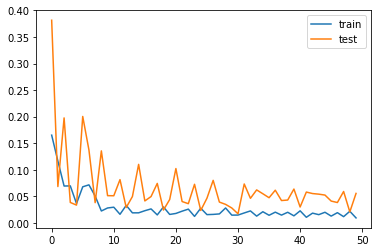

Train on 1348 samples, validate on 7406 samples
Epoch 1/50
 - 4s - loss: 0.1953 - val_loss: 0.4112
Epoch 2/50
 - 2s - loss: 0.1253 - val_loss: 0.1118
Epoch 3/50
 - 2s - loss: 0.0633 - val_loss: 0.1603
Epoch 4/50
 - 2s - loss: 0.0449 - val_loss: 0.0884
Epoch 5/50
 - 2s - loss: 0.0571 - val_loss: 0.0458
Epoch 6/50
 - 2s - loss: 0.0244 - val_loss: 0.1038
Epoch 7/50
 - 2s - loss: 0.0426 - val_loss: 0.1362
Epoch 8/50
 - 2s - loss: 0.0507 - val_loss: 0.0412
Epoch 9/50
 - 2s - loss: 0.0228 - val_loss: 0.1229
Epoch 10/50
 - 2s - loss: 0.0269 - val_loss: 0.0781
Epoch 11/50
 - 2s - loss: 0.0411 - val_loss: 0.0369
Epoch 12/50
 - 2s - loss: 0.0229 - val_loss: 0.0363
Epoch 13/50
 - 2s - loss: 0.0187 - val_loss: 0.1550
Epoch 14/50
 - 2s - loss: 0.0385 - val_loss: 0.0404
Epoch 15/50
 - 2s - loss: 0.0151 - val_loss: 0.1019
Epoch 16/50
 - 2s - loss: 0.0301 - val_loss: 0.0699
Epoch 17/50
 - 2s - loss: 0.0190 - val_loss: 0.0702
Epoch 18/50
 - 2s - loss: 0.0296 - val_loss: 0.0540
Epoch 19/50
 - 2s - loss:

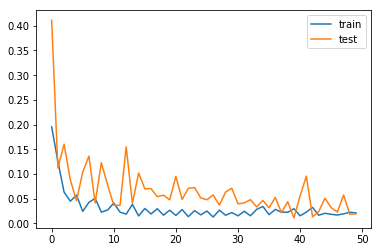

Train on 1348 samples, validate on 7406 samples
Epoch 1/50
 - 4s - loss: 0.1740 - val_loss: 0.3010
Epoch 2/50
 - 2s - loss: 0.1202 - val_loss: 0.1368
Epoch 3/50
 - 2s - loss: 0.0778 - val_loss: 0.0721
Epoch 4/50
 - 2s - loss: 0.0456 - val_loss: 0.1739
Epoch 5/50
 - 2s - loss: 0.0293 - val_loss: 0.0727
Epoch 6/50
 - 2s - loss: 0.0512 - val_loss: 0.0220
Epoch 7/50
 - 2s - loss: 0.0257 - val_loss: 0.1209
Epoch 8/50
 - 2s - loss: 0.0365 - val_loss: 0.0620
Epoch 9/50
 - 2s - loss: 0.0515 - val_loss: 0.0397
Epoch 10/50
 - 2s - loss: 0.0402 - val_loss: 0.0488
Epoch 11/50
 - 2s - loss: 0.0147 - val_loss: 0.0806
Epoch 12/50
 - 2s - loss: 0.0163 - val_loss: 0.0831
Epoch 13/50
 - 2s - loss: 0.0135 - val_loss: 0.0453
Epoch 14/50
 - 2s - loss: 0.0173 - val_loss: 0.1230
Epoch 15/50
 - 2s - loss: 0.0180 - val_loss: 0.0459
Epoch 16/50
 - 2s - loss: 0.0307 - val_loss: 0.0774
Epoch 17/50
 - 2s - loss: 0.0126 - val_loss: 0.0157
Epoch 18/50
 - 2s - loss: 0.0226 - val_loss: 0.1094
Epoch 19/50
 - 2s - loss:

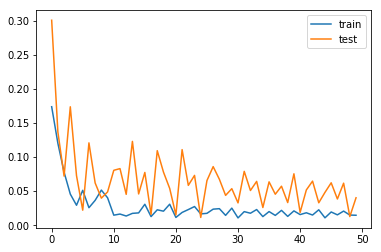

Train on 1348 samples, validate on 7406 samples
Epoch 1/50
 - 4s - loss: 0.1543 - val_loss: 0.3789
Epoch 2/50
 - 2s - loss: 0.1039 - val_loss: 0.1186
Epoch 3/50
 - 2s - loss: 0.0552 - val_loss: 0.1254
Epoch 4/50
 - 2s - loss: 0.0565 - val_loss: 0.0466
Epoch 5/50
 - 2s - loss: 0.0311 - val_loss: 0.0250
Epoch 6/50
 - 2s - loss: 0.0437 - val_loss: 0.1909
Epoch 7/50
 - 2s - loss: 0.0516 - val_loss: 0.0869
Epoch 8/50
 - 2s - loss: 0.0250 - val_loss: 0.0887
Epoch 9/50
 - 2s - loss: 0.0305 - val_loss: 0.1162
Epoch 10/50
 - 2s - loss: 0.0304 - val_loss: 0.0301
Epoch 11/50
 - 2s - loss: 0.0146 - val_loss: 0.0740
Epoch 12/50
 - 2s - loss: 0.0261 - val_loss: 0.0426
Epoch 13/50
 - 2s - loss: 0.0152 - val_loss: 0.0779
Epoch 14/50
 - 2s - loss: 0.0256 - val_loss: 0.0500
Epoch 15/50
 - 2s - loss: 0.0165 - val_loss: 0.0674
Epoch 16/50
 - 2s - loss: 0.0270 - val_loss: 0.0612
Epoch 17/50
 - 2s - loss: 0.0179 - val_loss: 0.0448
Epoch 18/50
 - 2s - loss: 0.0198 - val_loss: 0.0338
Epoch 19/50
 - 2s - loss:

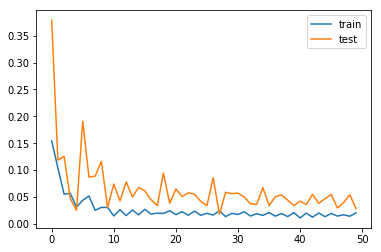

Train on 1348 samples, validate on 7406 samples
Epoch 1/50
 - 4s - loss: 0.1966 - val_loss: 0.4021
Epoch 2/50
 - 2s - loss: 0.1359 - val_loss: 0.1362
Epoch 3/50
 - 2s - loss: 0.0894 - val_loss: 0.1018
Epoch 4/50
 - 2s - loss: 0.0528 - val_loss: 0.1973
Epoch 5/50
 - 2s - loss: 0.0778 - val_loss: 0.0646
Epoch 6/50
 - 2s - loss: 0.0503 - val_loss: 0.0539
Epoch 7/50
 - 2s - loss: 0.0388 - val_loss: 0.0625
Epoch 8/50
 - 2s - loss: 0.0499 - val_loss: 0.0629
Epoch 9/50
 - 2s - loss: 0.0295 - val_loss: 0.1302
Epoch 10/50
 - 2s - loss: 0.0402 - val_loss: 0.1242
Epoch 11/50
 - 2s - loss: 0.0456 - val_loss: 0.0321
Epoch 12/50
 - 2s - loss: 0.0185 - val_loss: 0.1189
Epoch 13/50
 - 2s - loss: 0.0277 - val_loss: 0.0425
Epoch 14/50
 - 2s - loss: 0.0391 - val_loss: 0.0513
Epoch 15/50
 - 2s - loss: 0.0197 - val_loss: 0.0914
Epoch 16/50
 - 2s - loss: 0.0253 - val_loss: 0.1227
Epoch 17/50
 - 2s - loss: 0.0339 - val_loss: 0.0850
Epoch 18/50
 - 2s - loss: 0.0197 - val_loss: 0.0538
Epoch 19/50
 - 2s - loss:

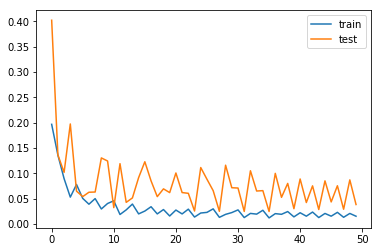

Train on 1348 samples, validate on 7406 samples
Epoch 1/50
 - 5s - loss: 0.1543 - val_loss: 0.3036
Epoch 2/50
 - 2s - loss: 0.0900 - val_loss: 0.1512
Epoch 3/50
 - 2s - loss: 0.0452 - val_loss: 0.1535
Epoch 4/50
 - 2s - loss: 0.0714 - val_loss: 0.1083
Epoch 5/50
 - 2s - loss: 0.0465 - val_loss: 0.1490
Epoch 6/50
 - 2s - loss: 0.0285 - val_loss: 0.0715
Epoch 7/50
 - 2s - loss: 0.0219 - val_loss: 0.0710
Epoch 8/50
 - 2s - loss: 0.0156 - val_loss: 0.1229
Epoch 9/50
 - 2s - loss: 0.0499 - val_loss: 0.0953
Epoch 10/50
 - 2s - loss: 0.0274 - val_loss: 0.0459
Epoch 11/50
 - 2s - loss: 0.0357 - val_loss: 0.1881
Epoch 12/50
 - 2s - loss: 0.0335 - val_loss: 0.0350
Epoch 13/50
 - 2s - loss: 0.0223 - val_loss: 0.0761
Epoch 14/50
 - 2s - loss: 0.0206 - val_loss: 0.1121
Epoch 15/50
 - 2s - loss: 0.0378 - val_loss: 0.0859
Epoch 16/50
 - 2s - loss: 0.0180 - val_loss: 0.0246
Epoch 17/50
 - 2s - loss: 0.0257 - val_loss: 0.1677
Epoch 18/50
 - 2s - loss: 0.0250 - val_loss: 0.0523
Epoch 19/50
 - 2s - loss:

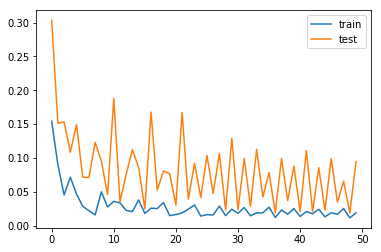

Train on 1348 samples, validate on 7406 samples
Epoch 1/50
 - 5s - loss: 0.1797 - val_loss: 0.4076
Epoch 2/50
 - 2s - loss: 0.1193 - val_loss: 0.1093
Epoch 3/50
 - 2s - loss: 0.0665 - val_loss: 0.1156
Epoch 4/50
 - 2s - loss: 0.0342 - val_loss: 0.0542
Epoch 5/50
 - 2s - loss: 0.0519 - val_loss: 0.0472
Epoch 6/50
 - 2s - loss: 0.0277 - val_loss: 0.1452
Epoch 7/50
 - 2s - loss: 0.0374 - val_loss: 0.1754
Epoch 8/50
 - 2s - loss: 0.0509 - val_loss: 0.0247
Epoch 9/50
 - 2s - loss: 0.0262 - val_loss: 0.1249
Epoch 10/50
 - 2s - loss: 0.0353 - val_loss: 0.0911
Epoch 11/50
 - 2s - loss: 0.0344 - val_loss: 0.0542
Epoch 12/50
 - 2s - loss: 0.0162 - val_loss: 0.0325
Epoch 13/50
 - 2s - loss: 0.0172 - val_loss: 0.0200
Epoch 14/50
 - 2s - loss: 0.0215 - val_loss: 0.0669
Epoch 15/50
 - 2s - loss: 0.0236 - val_loss: 0.0403
Epoch 16/50
 - 2s - loss: 0.0263 - val_loss: 0.0958
Epoch 17/50
 - 2s - loss: 0.0225 - val_loss: 0.0172
Epoch 18/50
 - 2s - loss: 0.0262 - val_loss: 0.0547
Epoch 19/50
 - 2s - loss:

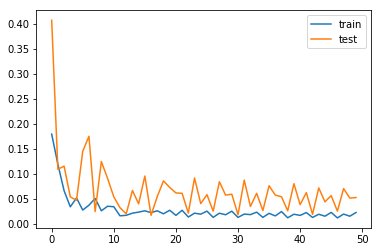

Train on 1348 samples, validate on 7406 samples
Epoch 1/50
 - 5s - loss: 0.1777 - val_loss: 0.4273
Epoch 2/50
 - 2s - loss: 0.1192 - val_loss: 0.1394
Epoch 3/50
 - 2s - loss: 0.0570 - val_loss: 0.2186
Epoch 4/50
 - 2s - loss: 0.0440 - val_loss: 0.0577
Epoch 5/50
 - 2s - loss: 0.0415 - val_loss: 0.0755
Epoch 6/50
 - 2s - loss: 0.0244 - val_loss: 0.1096
Epoch 7/50
 - 2s - loss: 0.0503 - val_loss: 0.0242
Epoch 8/50
 - 2s - loss: 0.0290 - val_loss: 0.0552
Epoch 9/50
 - 2s - loss: 0.0210 - val_loss: 0.0472
Epoch 10/50
 - 2s - loss: 0.0394 - val_loss: 0.1239
Epoch 11/50
 - 2s - loss: 0.0334 - val_loss: 0.0375
Epoch 12/50
 - 2s - loss: 0.0273 - val_loss: 0.0231
Epoch 13/50
 - 2s - loss: 0.0317 - val_loss: 0.0320
Epoch 14/50
 - 2s - loss: 0.0213 - val_loss: 0.0722
Epoch 15/50
 - 2s - loss: 0.0255 - val_loss: 0.1173
Epoch 16/50
 - 2s - loss: 0.0224 - val_loss: 0.0331
Epoch 17/50
 - 2s - loss: 0.0319 - val_loss: 0.0367
Epoch 18/50
 - 2s - loss: 0.0218 - val_loss: 0.0288
Epoch 19/50
 - 2s - loss:

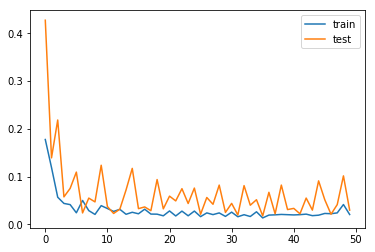

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import warnings
warnings.filterwarnings("ignore")
# design network
models = []
for i in range(10):
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    models.append(model)
for j in range(10):
    # fit network
    history = models[j].fit(train_X, outs[j][0], epochs=50, batch_size=72, validation_data=(test_X, outs[j][1]), verbose=2, shuffle=False);
    # plot history
    pyplot.plot(history.history['loss'], label='train');
    pyplot.plot(history.history['val_loss'], label='test');
    pyplot.legend();
    pyplot.show()

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# save the model to disk
Sum=0

for i in range(10):
    models[i].save(str(5*(i+1))+'finalized_model.model')
    # make a prediction
    yhat = models[i].predict(test_X)
    
    reshaped_test_X = test_X.reshape((test_X.shape[0], n_5mins*n_features))
    
    # invert scaling for forecast
    #inv_yhat = concatenate((yhat, reshaped_test_X[:, -7:]), axis=1)
    #inv_yhat = scaler.inverse_transform(inv_yhat)
    #inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    #test_y = outs[i][1].reshape((len(outs[i][1]), 1))
    #inv_y = concatenate((test_y, reshaped_test_X[:, -7:]), axis=1)
    #inv_y = scaler.inverse_transform(inv_y)
    #inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = sqrt(mean_squared_error(outs[i][1], yhat))
    print('RMSE of final prices model for '+str(5*(i+1))+' minutes later: %.3f'%rmse) 
    Sum+=rmse
    #clfreg = LinearRegression()
    #clfreg1 = LinearRegression()
    #clfreg.fit(reshaped_test_X[:,-3], inv_y)
    #y_pred=clfreg.predict(reshaped_test_X[:,-3])
    #clfreg1.fit(reshaped_test_X[:,-3], inv_yhat)
    #y_pred1=clfreg1.predict(reshaped_test_X[:,-3])
    #plt.plot(reshaped_test_X[:,-3], y_pred , 'c',label='original price')
    #plt.plot(reshaped_test_X[:,-3],y_pred1 , 'r',label='predicted price')
    #plt.xlabel('Area');
    #plt.ylabel('Price');
    #pyplot.legend();
    #plt.show();
print('Total RMSE of final prices models: %.3f'%(Sum/10))  


RMSE of final prices model for 5 minutes later: 0.031
RMSE of final prices model for 10 minutes later: 0.065
RMSE of final prices model for 15 minutes later: 0.068
RMSE of final prices model for 20 minutes later: 0.029
RMSE of final prices model for 25 minutes later: 0.048
RMSE of final prices model for 30 minutes later: 0.035
RMSE of final prices model for 35 minutes later: 0.044
RMSE of final prices model for 40 minutes later: 0.122
RMSE of final prices model for 45 minutes later: 0.066
RMSE of final prices model for 50 minutes later: 0.042
Total RMSE of final prices models: 0.055


In [26]:
#print(test_X[:,5])
mape = (abs(outs[0][1]-yhat)/outs[0][1]).mean()
a = test_y
b= a[a==0]
#print(b)
print(mape)
#print(outs[0][1])
#print(yhat)

1.3158387
